In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/varunagarwal97/Predict-Employee-Attrition/master/HR.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [2]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
# there is column employee number in the dataset that we can drop as it does not help so we drop
df.drop(columns=["EmployeeNumber"],inplace=True)

In [5]:
#Lets see over18 columns
df["Over18"].unique()
#this columns has only one value throught the dataset so it will not help us in any way so lets drop

array(['Y'], dtype=object)

In [6]:
df.drop(columns=["Over18"],inplace=True)

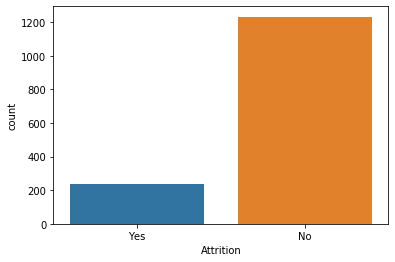

In [7]:
#Lets check the count of attrition
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Attrition",data=df)
plt.show()
#so this is a higly imbalanced dataset,here out of every 7 employee 1 is facing attrition

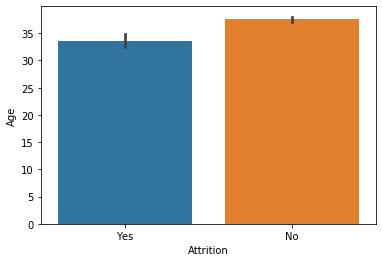

In [8]:
# Lets see average age of employee who is leaving to that who are staying
sns.barplot(x="Attrition",y="Age",data=df)
plt.show()
#below graph shows that people who are staying has average more

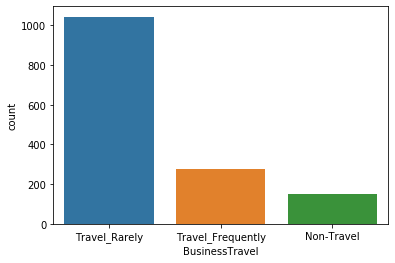

In [9]:
# Lets check the count of employees based on buisness travel
sns.countplot(x="BusinessTravel",data=df)
plt.show()
# most of the employee travel rarely

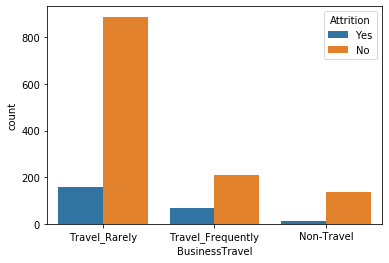

In [10]:
# Lets see the count of each categary of buisness travel where employee attrition is true
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")
plt.show()
# based on below graph it can be cancluded that propartion of attrition is higher where travel is frequent

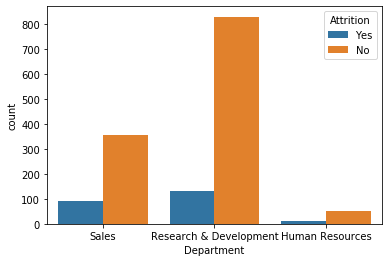

In [11]:
# Lets check in which department attrintion is high
sns.countplot(x="Department",data=df,hue="Attrition")
plt.show()
# here if we compaire ratio then in sales 1 out of 4 employee attrition is there
# in R&D it is 1 of 9

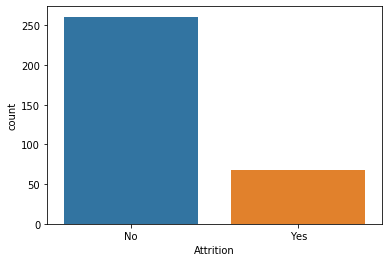

In [12]:
#Lets check when distance from home is above 15 kms whats the attrition
sns.countplot(x="Attrition",data=df.loc[df["DistanceFromHome"]>15])
plt.show()

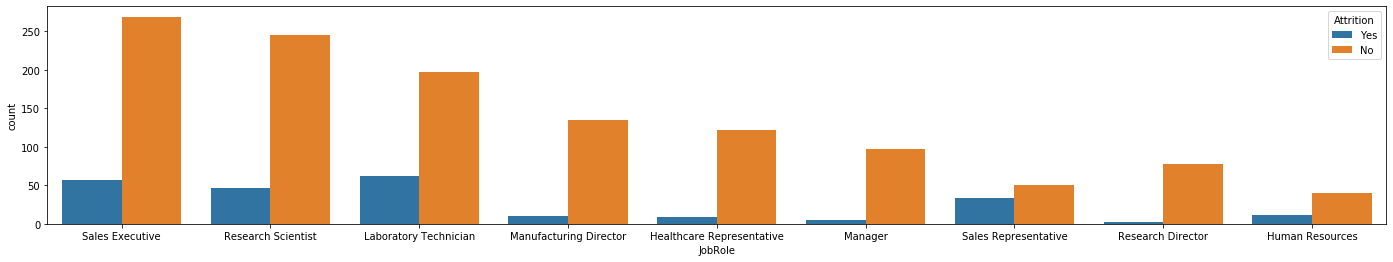

In [13]:
# Lets check the attrition in each job role
plt.figure(figsize=(24,4))
sns.countplot(x="JobRole",data=df,hue="Attrition")
plt.show()
#so we can analyse the attrition ratio in each categary and take corrective actions by understanding the reason behind the attrition

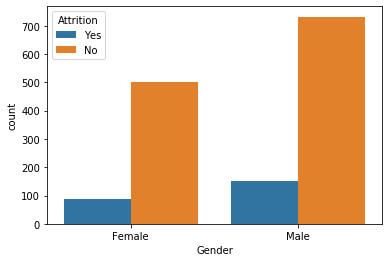

In [14]:
# Lets check the attrition ratio based on gender
sns.countplot(x="Gender",data=df,hue="Attrition")
plt.show()

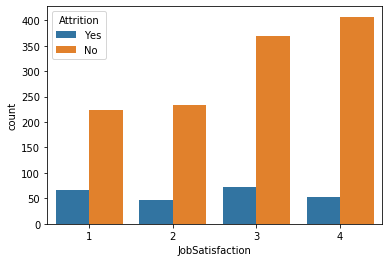

In [15]:
#lets chcek the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",data=df,hue="Attrition")
plt.show()
#here we are able  to see that as job satisfaction increases proportion of aleavers decreases

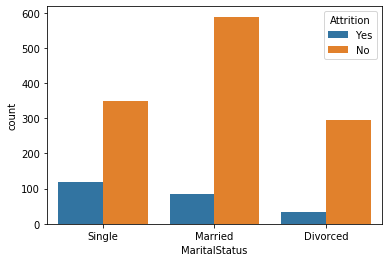

In [16]:
#Lets chcek the attrition ratio in MaritalStatus
sns.countplot(x="MaritalStatus",data=df,hue="Attrition")
plt.show()
#in singles ratio is higher

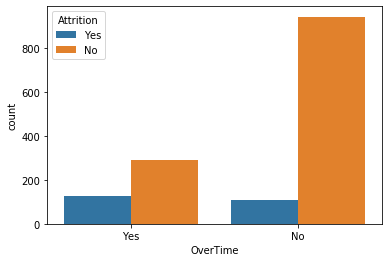

In [17]:
#Lets compare check the proportion of attrition based on overtime
sns.countplot(x="OverTime",data=df,hue="Attrition")
plt.show()
#Below if graph clearly shows if overtime is there then attrition proportion is higher

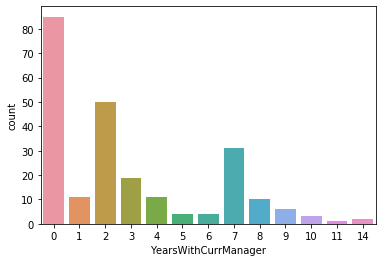

In [18]:
sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
#here we came to know that if years working wth current manager is 0 then attrition was very high
#Also after 2 years of working significant amut of people left
#so it can be new project they mved to they dint like job role or something else

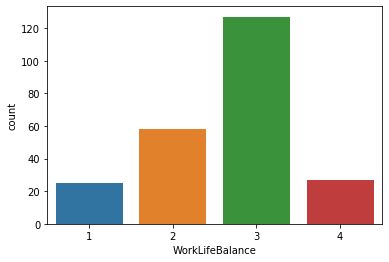

In [19]:
#lets chcek the work life balance with attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

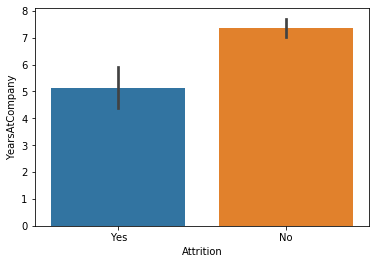

In [20]:
# average working years of the employee who left and wh stayed
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)
plt.show()
# so here we get what is the average number of years employee is staying in the company before leaving

In [21]:
#Lets check the time laped since  last promotion
df.loc[df["Attrition"]=="Yes"].groupby(["YearsSinceLastPromotion"]).agg({"Attrition":"count"})
#here majority almost half of people left not even single year passed since last promotion
#we can conclude promotion is not the factr why people left the company

,Attrition
YearsSinceLastPromotion,
0,110
1,49
2,27
3,9
4,5
5,2
6,6
7,16
9,4


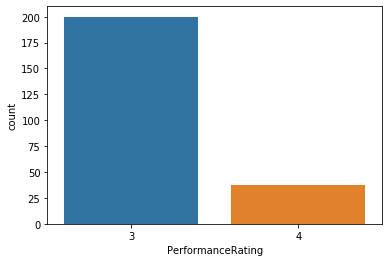

In [22]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
#may be since they expect that their work deserves more rating and is undervalued
#almost all the people who left were who got ating 3

In [23]:
df["EmployeeCount"].unique()
#Here we see that EmployeeCount is having same vaue in entire dataset

array([1], dtype=int64)

In [24]:
#Lets drop EmployeeCount column
df.drop(columns=["EmployeeCount"],inplace=True)

In [25]:
df["StandardHours"].unique()
#Here we see that StandardHours has same value throughout

array([80], dtype=int64)

In [26]:
#Lets drop StandardHours as it will not proovide any infrmation
df.drop(columns=["StandardHours"],inplace=True)

In [27]:
#lets see correlation matrix
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [28]:
#lets chcek the skewness in the dataset
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


In [29]:
#lets seprate the input and output column
df_x=df.drop(columns=["Attrition"])
y=df[["Attrition"]]

In [30]:
#lets treat the skewness in the input dataset
import numpy as np
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [31]:
#Lets again check the skewness
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))
#Based on below o/p we can say we have reduced significantly skewed features from 14 to 3

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


In [32]:
#Lets count the number of columns of object datatype
print(df_x.dtypes.loc[df_x.dtypes=="object"])

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


In [33]:
#we need to convert above columns to 1 and 0 using pd.get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)

In [34]:
#lets see df_x
df_x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,3,41,4,1.098612,4,7.852439,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,4,42,2,1.386294,1,9.209540,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2,87,4,1.098612,2,8.723069,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,4,63,2,1.098612,2,8.592486,...,0,0,0,0,0,1,0,1,0,0


In [35]:
#Lets bring features to common scale as we will use logistic regression also
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [36]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, ..., 0, 0, 0])

In [37]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [38]:
#Lets use logistic regression and check
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.7027306400206735
auc roc score corresponding to  43  is  0.7989921612541994
auc roc score corresponding to  44  is  0.7721164613661814
auc roc score corresponding to  45  is  0.7386941166336461
auc roc score corresponding to  46  is  0.7437763803945215
auc roc score corresponding to  47  is  0.7630286846412266
auc roc score corresponding to  48  is  0.7726333017486432
auc roc score corresponding to  49  is  0.7478249633904729
auc roc score corresponding to  50  is  0.7979584804892755
auc roc score corresponding to  51  is  0.8035575846326126
auc roc score corresponding to  52  is  0.7681109484021018
auc roc score corresponding to  53  is  0.8278490826083211
auc roc score corresponding to  54  is  0.7437763803945215
auc roc score corresponding to  55  is  0.7346455336376948
auc roc score corresponding to  56  is  0.773666982513567
auc roc score corresponding to  57  is  0.7493324145059868
auc roc score corresponding to  58  is  0.710354035661986

70

In [39]:
#lets use cross_val_score
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.8425184815957902
standard deviation in roc auc score for logistic classifier:  0.018609160244716556
[0.84281843 0.84569783 0.83607546 0.81505728 0.87294341]


In [40]:
#lets chcek Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
max_aucroc_score(gnb,df_x,y)

auc roc score corresponding to  42  is  0.6187010078387458
auc roc score corresponding to  43  is  0.7367128951675425
auc roc score corresponding to  44  is  0.651606512188819
auc roc score corresponding to  45  is  0.6546644844517185
auc roc score corresponding to  46  is  0.6607373589456457
auc roc score corresponding to  47  is  0.6632784908260833
auc roc score corresponding to  48  is  0.6835214058058403
auc roc score corresponding to  49  is  0.6830476354552503
auc roc score corresponding to  50  is  0.6404513739340167
auc roc score corresponding to  51  is  0.7559651994142476
auc roc score corresponding to  52  is  0.6572056163321562
auc roc score corresponding to  53  is  0.671375656817986
auc roc score corresponding to  54  is  0.5918683779825997
auc roc score corresponding to  55  is  0.6845550865707641
auc roc score corresponding to  56  is  0.6354121802050133
auc roc score corresponding to  57  is  0.6212421397191834
auc roc score corresponding to  58  is  0.6399776035834266

93

In [41]:
print("Mean auc roc score for GaussianNB: ",cross_val_score(gnb,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for GaussianNB: ",cross_val_score(gnb,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gnb,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for GaussianNB:  0.7776750268633275
standard deviation in auc roc score for GaussianNB:  0.020179996594095338
[0.79175136 0.78539973 0.76397623 0.74571453 0.80153329]


In [42]:
#lets chcek decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,df_x,y)

auc roc score corresponding to  42  is  0.6089671806357136
auc roc score corresponding to  43  is  0.5887242656559565
auc roc score corresponding to  44  is  0.5988457231458351
auc roc score corresponding to  45  is  0.5613747954173487
auc roc score corresponding to  46  is  0.6064691187871478
auc roc score corresponding to  47  is  0.6145662847790506
auc roc score corresponding to  48  is  0.6525540528899991
auc roc score corresponding to  49  is  0.5841588422775433
auc roc score corresponding to  50  is  0.6180980273925403
auc roc score corresponding to  51  is  0.646481178396072
auc roc score corresponding to  52  is  0.6019036954087346
auc roc score corresponding to  53  is  0.6272288741493669
auc roc score corresponding to  54  is  0.531010422947713
auc roc score corresponding to  55  is  0.5532776294254458
auc roc score corresponding to  56  is  0.577612197433026
auc roc score corresponding to  57  is  0.565940218795762
auc roc score corresponding to  58  is  0.6252045826513911
a

64

In [43]:
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.6274011061294609
standard deviation in auc roc score for decision tree classifier:  0.01853787539679418
[0.62245935 0.63313008 0.65354466 0.58975795 0.62012232]


In [44]:
#lets use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 500}

In [45]:
rf_clf=RandomForestClassifier(n_estimators=500)
max_aucroc_score(rf_clf,df_x,y)

auc roc score corresponding to  42  is  0.5608148850030149
auc roc score corresponding to  43  is  0.6175381169782066
auc roc score corresponding to  44  is  0.6089241106038419
auc roc score corresponding to  45  is  0.6499698509776898
auc roc score corresponding to  46  is  0.6241278318545955
auc roc score corresponding to  47  is  0.5876475148591609
auc roc score corresponding to  48  is  0.641355844603325
auc roc score corresponding to  49  is  0.5729606339908692
auc roc score corresponding to  50  is  0.5795503488672581
auc roc score corresponding to  51  is  0.6028512361099146
auc roc score corresponding to  52  is  0.6195624084761823
auc roc score corresponding to  53  is  0.5856232233611852
auc roc score corresponding to  54  is  0.5689120509949178
auc roc score corresponding to  55  is  0.5770092169868206
auc roc score corresponding to  56  is  0.566887759496942
auc roc score corresponding to  57  is  0.5608148850030149
auc roc score corresponding to  58  is  0.6028512361099146

80

In [46]:
#lets check cross_val_score
print("Mean auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for random forest classifier: ",cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(rf_clf,df_x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for random forest classifier:  0.8148738911801212
standard deviation in auc roc score for random forest classifier:  0.02674414555664114
[0.82143462 0.7696477  0.83943492 0.77452838 0.84283745]


In [47]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 28}

In [48]:
kc=KNeighborsClassifier(n_neighbors=28)
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.6552243948660522
auc roc score corresponding to  43  is  0.6856318373675596
auc roc score corresponding to  44  is  0.6881729692479972
auc roc score corresponding to  45  is  0.6587992075114135
auc roc score corresponding to  46  is  0.6709449564992678
auc roc score corresponding to  47  is  0.6562580756309759
auc roc score corresponding to  48  is  0.6542337841330003
auc roc score corresponding to  49  is  0.6268843138943923
auc roc score corresponding to  50  is  0.6162460160220519
auc roc score corresponding to  51  is  0.7307261607373589
auc roc score corresponding to  52  is  0.6815832543716082
auc roc score corresponding to  53  is  0.6506589714876388
auc roc score corresponding to  54  is  0.6739598587302955
auc roc score corresponding to  55  is  0.6375226117667327
auc roc score corresponding to  56  is  0.6400637436471703
auc roc score corresponding to  57  is  0.6557412352485141
auc roc score corresponding to  58  is  0.58639848393487

70

In [49]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [50]:
svc=SVC(kernel="linear",C=0.1)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.7427426996295977
auc roc score corresponding to  43  is  0.8076061676285641
auc roc score corresponding to  44  is  0.7939098974933241
auc roc score corresponding to  45  is  0.7473081230080111
auc roc score corresponding to  46  is  0.6986820570247223
auc roc score corresponding to  47  is  0.7285726591437677
auc roc score corresponding to  48  is  0.7766818847445947
auc roc score corresponding to  49  is  0.7665604272547161
auc roc score corresponding to  50  is  0.7528641571194763
auc roc score corresponding to  51  is  0.8314238952536824
auc roc score corresponding to  52  is  0.7873632526488068
auc roc score corresponding to  53  is  0.8060556464811783
auc roc score corresponding to  54  is  0.7513567060039625
auc roc score corresponding to  55  is  0.7346455336376948
auc roc score corresponding to  56  is  0.7802566973899561
auc roc score corresponding to  57  is  0.7533809975019382
auc roc score corresponding to  58  is  0.70376432078559

70

In [51]:
#Lets use Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [52]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
max_aucroc_score(gb_clf,df_x,y)

auc roc score corresponding to  42  is  0.627185804117495
auc roc score corresponding to  43  is  0.6585838573520545
auc roc score corresponding to  44  is  0.6373072616073735
auc roc score corresponding to  45  is  0.6504866913601516
auc roc score corresponding to  46  is  0.6332586786114222
auc roc score corresponding to  47  is  0.7051856318373675
auc roc score corresponding to  48  is  0.6585838573520545
auc roc score corresponding to  49  is  0.6286932552330088
auc roc score corresponding to  50  is  0.66060814885003
auc roc score corresponding to  51  is  0.6352829701093978
auc roc score corresponding to  52  is  0.6596175381169782
auc roc score corresponding to  53  is  0.6712464467223705
auc roc score corresponding to  54  is  0.5967783616159876
auc roc score corresponding to  55  is  0.613489533982255
auc roc score corresponding to  56  is  0.5891980360065466
auc roc score corresponding to  57  is  0.6332586786114222
auc roc score corresponding to  58  is  0.6246446722370574
a

80

In [53]:
#Lets use ada boosting using svm as an estimator
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
max_aucroc_score(ada_clf,x,y)

auc roc score corresponding to  42  is  0.7149194590403998
auc roc score corresponding to  43  is  0.7590231716771471
auc roc score corresponding to  44  is  0.6891205099491774
auc roc score corresponding to  45  is  0.664312171591007
auc roc score corresponding to  46  is  0.6719355672323197
auc roc score corresponding to  47  is  0.691661641829615
auc roc score corresponding to  48  is  0.7103971056938583
auc roc score corresponding to  49  is  0.7235765354466362
auc roc score corresponding to  50  is  0.6886036695667155
auc roc score corresponding to  51  is  0.7848651908002412
auc roc score corresponding to  52  is  0.7165130502196572
auc roc score corresponding to  53  is  0.6962270652080284
auc roc score corresponding to  54  is  0.6532001033680764
auc roc score corresponding to  55  is  0.7174605909208372
auc roc score corresponding to  56  is  0.7098802653113963
auc roc score corresponding to  57  is  0.6987251270565941
auc roc score corresponding to  58  is  0.6733999483159618

51

In [54]:
#Lets choose svm as our final model and random state 80
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 80,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
svc=SVC(kernel="linear",C=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[196  51]
 [ 10  37]]
f1 score is :  0.5481481481481482
classification report 
               precision    recall  f1-score   support

           0       0.95      0.79      0.87       247
           1       0.42      0.79      0.55        47

    accuracy                           0.79       294
   macro avg       0.69      0.79      0.71       294
weighted avg       0.87      0.79      0.81       294

AUC ROC Score:  0.7903781548798345
